# Import Libraries

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

In [2]:
#!pip3 install git+https://github.com/statsmodels/statsmodels.git

# Import Dataset

In [3]:
df = pd.read_csv("./economic_data.csv")

In [4]:
df

,year,unemployment_rate,annual_gdp_growth,inflation_rate,notable_events
0,1929,0.032,NaN,0.006,Market crash
1,1930,0.087,-0.085,-0.064,Smoot-Hawley
2,1931,0.159,-0.064,-0.093,Dust Bowl
3,1932,0.236,-0.129,-0.103,Hoover's tax hikes
4,1933,0.249,-0.012,0.008,FDR's New Deal
...,...,...,...,...,...
88,2017,0.041,0.023,0.021,Dollar weakened
89,2018,0.039,0.029,0.019,Trump tax cuts
90,2019,0.036,0.023,0.023,Goldilocks economy
91,2020,0.067,-0.034,0.014,COVID-19 pandemic and recession


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               93 non-null     int64  
 1   unemployment_rate  93 non-null     float64
 2   annual_gdp_growth  92 non-null     float64
 3   inflation_rate     93 non-null     float64
 4   notable_events     93 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


# Data Viz (EDA)

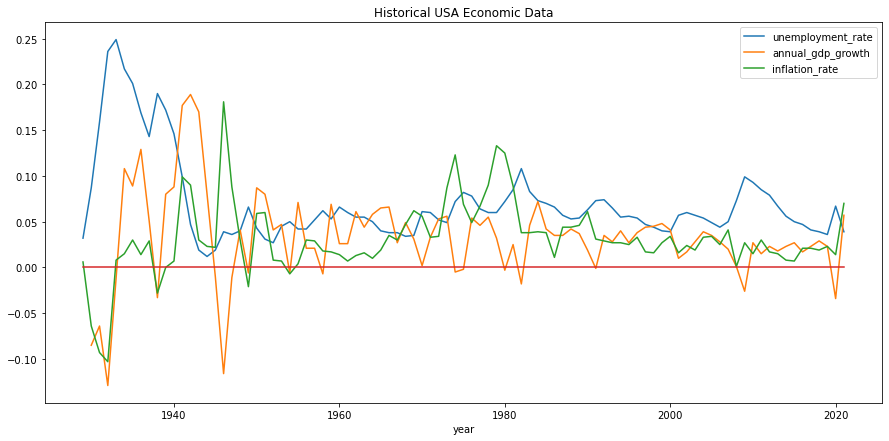

In [6]:
df.plot(figsize=(15, 7), kind='line', x='year', y=['unemployment_rate', 'annual_gdp_growth', 'inflation_rate'], title="Historical USA Economic Data")
plt.plot(df['year'], [0]*len(df))
plt.show()

In [7]:
df.corr()
# there is some correlation between annual gdp growth / unemployment rate and inflation rate - does any or both affect inflation rate?

,year,unemployment_rate,annual_gdp_growth,inflation_rate
year,1.000000,-0.379625,-0.120066,0.128903
unemployment_rate,-0.379625,1.000000,-0.140777,-0.346171
annual_gdp_growth,-0.120066,-0.140777,1.000000,0.231558
inflation_rate,0.128903,-0.346171,0.231558,1.000000


# Hypothesis Testing - Granger Causality Testing

In [8]:
df.columns.values

array(['year', 'unemployment_rate', 'annual_gdp_growth', 'inflation_rate',
       'notable_events'], dtype=object)

In [9]:
df_granger = df.dropna()

In [10]:
cols = df_granger.columns.values[1:4]
combinations_cols = list(combinations(cols, 2))

In [11]:
# https://www.statology.org/granger-causality-test-in-python/
# Granger Causality Hypothesis Testing to test if unemployment rate and/or annual gdp growth affect inflation rate
# this is a useful hypothesis test to conduct when determining which variables to include in a time series model
# p-value < 0.05 (not useful in predicting the variable being compared to)
# will typically just select one lagged version of a variable to avoid autocorrelation issues when modeling
for cols in combinations_cols:
    col1 = cols[0]
    col2 = cols[1]
    print(f'Does {col1} cause {col2}?')
    print(grangercausalitytests(df_granger[[col2, col1]], 3))
    print('\n'*10)
    print(f'Does {col2} cause {col1}?')
    print(grangercausalitytests(df_granger[[col1, col2]], 3))
    print('\n'*10)

Does unemployment_rate cause annual_gdp_growth?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6652 , p=0.0006  , df_denom=88, df_num=1
ssr based chi2 test:   chi2=13.0970 , p=0.0003  , df=1
likelihood ratio test: chi2=12.2362 , p=0.0005  , df=1
parameter F test:         F=12.6652 , p=0.0006  , df_denom=88, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1475  , p=0.0006  , df_denom=85, df_num=2
ssr based chi2 test:   chi2=17.2535 , p=0.0002  , df=2
likelihood ratio test: chi2=15.7847 , p=0.0004  , df=2
parameter F test:         F=8.1475  , p=0.0006  , df_denom=85, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7016  , p=0.0044  , df_denom=82, df_num=3
ssr based chi2 test:   chi2=15.3090 , p=0.0016  , df=3
likelihood ratio test: chi2=14.1262 , p=0.0027  , df=3
parameter F test:         F=4.7016  , p=0.0044  , df_denom=82, df_num=3
{1: ({'ssr_ftest': (12.665190493430504, 0.0006030692

ssr based F test:         F=0.0620  , p=0.8039  , df_denom=88, df_num=1
ssr based chi2 test:   chi2=0.0642  , p=0.8000  , df=1
likelihood ratio test: chi2=0.0641  , p=0.8001  , df=1
parameter F test:         F=0.0620  , p=0.8039  , df_denom=88, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3716  , p=0.6907  , df_denom=85, df_num=2
ssr based chi2 test:   chi2=0.7870  , p=0.6747  , df=2
likelihood ratio test: chi2=0.7835  , p=0.6759  , df=2
parameter F test:         F=0.3716  , p=0.6907  , df_denom=85, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3097  , p=0.2769  , df_denom=82, df_num=3
ssr based chi2 test:   chi2=4.2646  , p=0.2343  , df=3
likelihood ratio test: chi2=4.1656  , p=0.2441  , df=3
parameter F test:         F=1.3097  , p=0.2769  , df_denom=82, df_num=3
{1: ({'ssr_ftest': (0.0620454643932675, 0.8038721831663165, 88.0, 1), 'ssr_chi2test': (0.06416065067940162, 0.8000367611321432, 1), 'lrtest': (0.0

### Conclusion: 
#### 1) annual gdp growth rate lagged by 2 years has strong(est) causal relationship with unemployment rate (p-value ~ 0.9155)
#### 2) unemployment rate lagged by 1 year has strong(est) causal relationship (p-value ~ 0.9897) with inflation rate
#### 3) inflation rate lagged by 2 years has strong(est) causal relationship (p-value ~ 0.8696) with unemployment rate
#### 4) annual gdp growth rate lagged by 1 year has strong(est) causal relationship (p-value ~ 0.7112) with inflation rate
#### 5) inflation rate lagged by 1 year has strong(est) causal relationship (p-value ~ 0.8039) with annual gdp growth rate